<a href="https://colab.research.google.com/github/shinjihirako13-vis/Elevate-Lab-Task-2/blob/main/task_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
titanic.info()

In [4]:
import pandas as pd

titanic = pd.read_csv('Titanic-Dataset.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Mean, median and std dev of numeric columns

print("Mean:\n", titanic.mean(numeric_only=True))

print("Median:\n", titanic.median(numeric_only=True))

print("Standard Deviation:\n", titanic.std(numeric_only=True))


Mean:
 PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64
Median:
 PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64
Standard Deviation:
 PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64


In [19]:
# finding the missing values in the columns
titanic.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


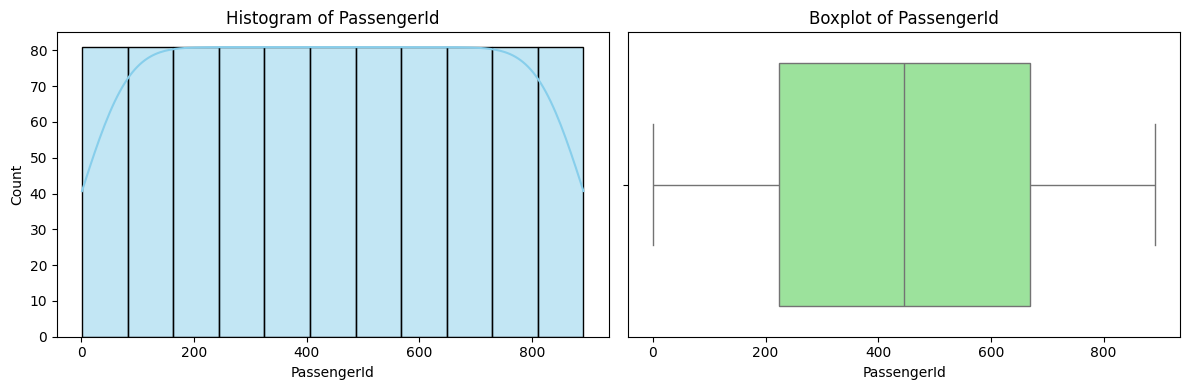

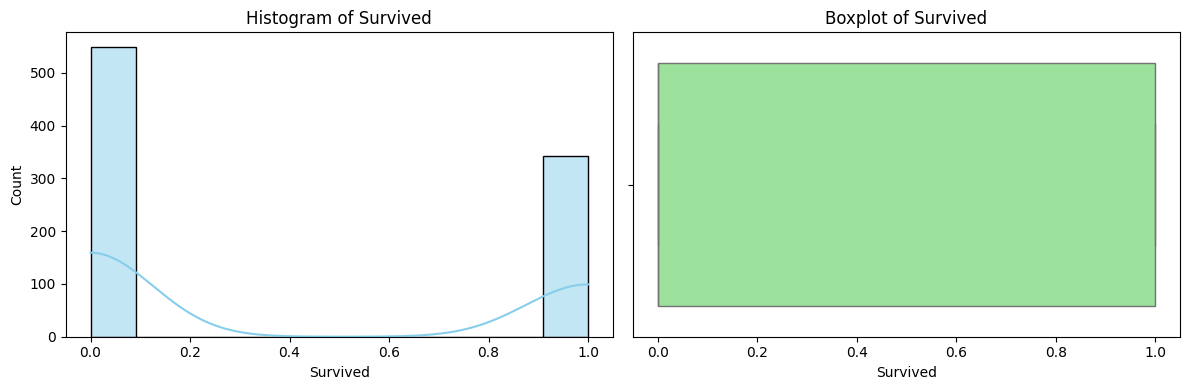

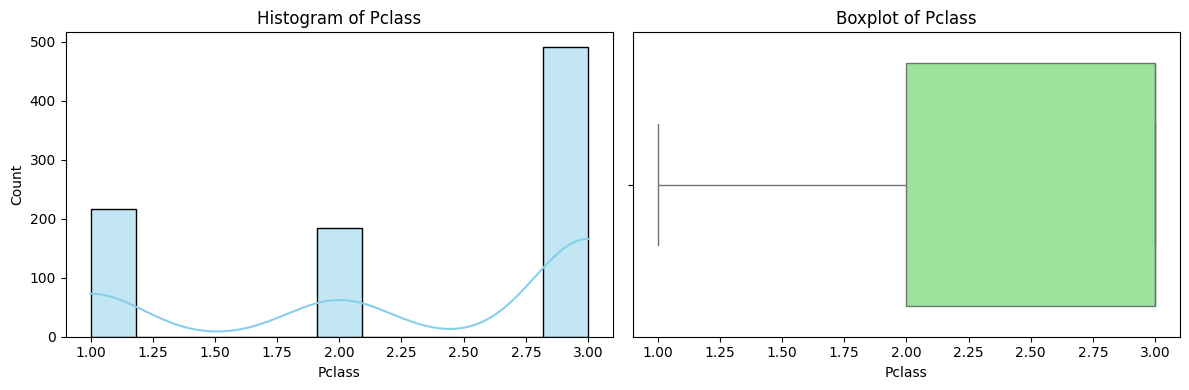

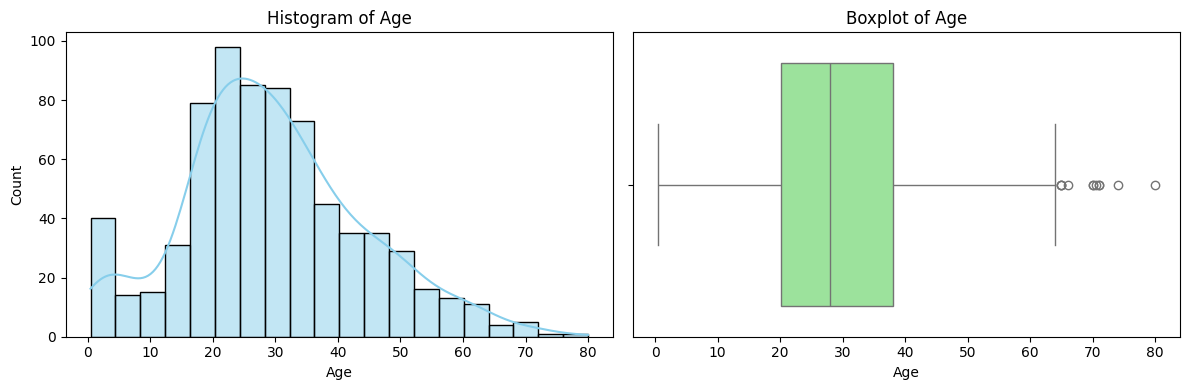

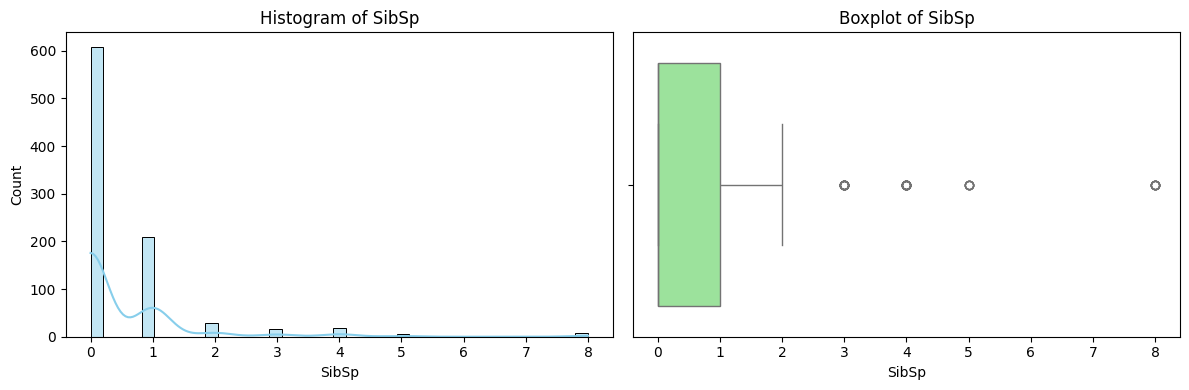

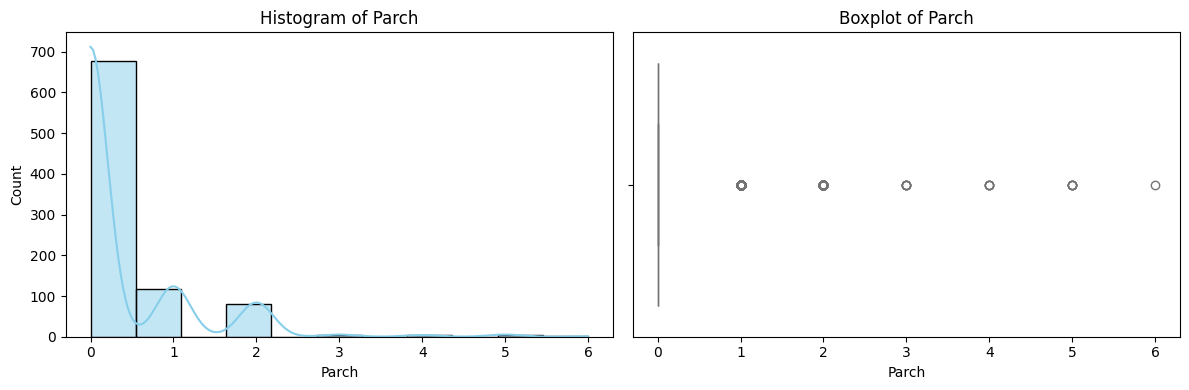

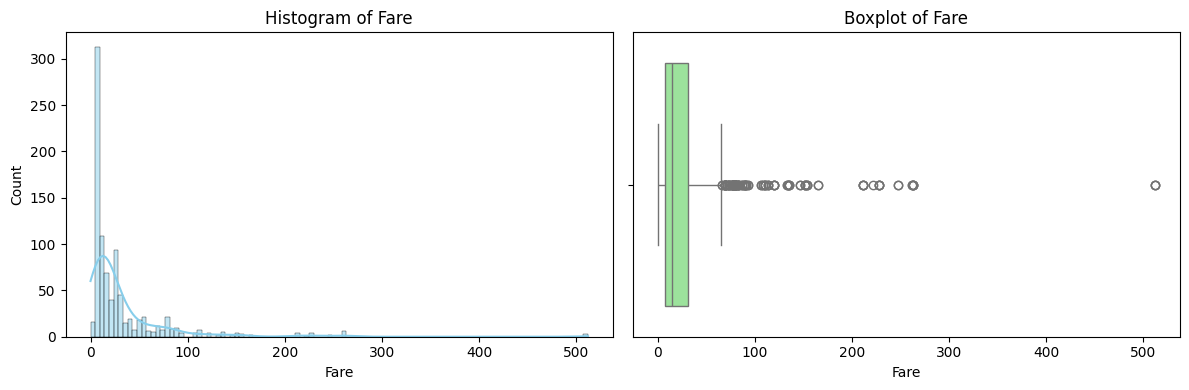

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = titanic.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(titanic[col].dropna(), kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram of {col}')

    sns.boxplot(x=titanic[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


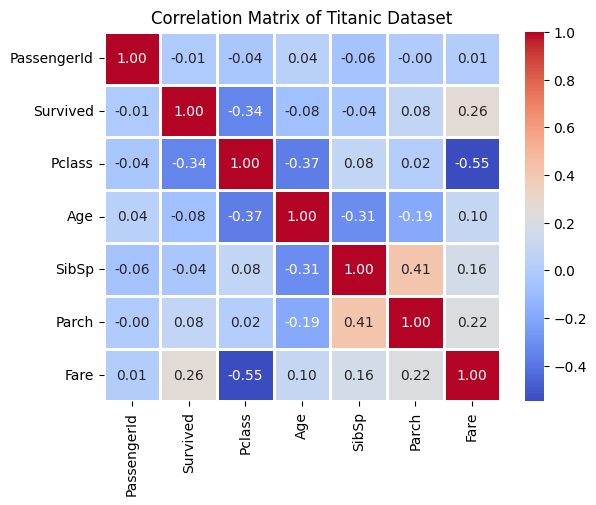

In [13]:
corr = titanic.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1.0)
plt.title("Correlation Matrix of Titanic Dataset")
plt.show()


In [15]:
# finding the outliers
numeric_cols = titanic.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = titanic[col].quantile(0.25)
    Q3 = titanic[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = titanic[(titanic[col] < lower_bound) | (titanic[col] > upper_bound)]

    print(f"\n🔹 Column: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print(outliers[[col]].head())



🔹 Column: PassengerId
Number of outliers: 0
Empty DataFrame
Columns: [PassengerId]
Index: []

🔹 Column: Survived
Number of outliers: 0
Empty DataFrame
Columns: [Survived]
Index: []

🔹 Column: Pclass
Number of outliers: 0
Empty DataFrame
Columns: [Pclass]
Index: []

🔹 Column: Age
Number of outliers: 11
      Age
33   66.0
54   65.0
96   71.0
116  70.5
280  65.0

🔹 Column: SibSp
Number of outliers: 46
    SibSp
7       3
16      4
24      3
27      3
50      4

🔹 Column: Parch
Number of outliers: 213
    Parch
7       1
8       2
10      1
13      5
16      1

🔹 Column: Fare
Number of outliers: 116
        Fare
1    71.2833
27  263.0000
31  146.5208
34   82.1708
52   76.7292


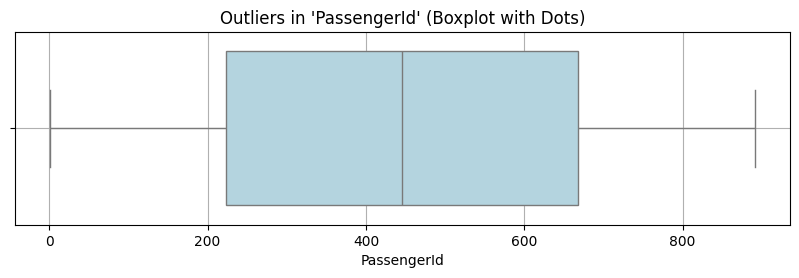

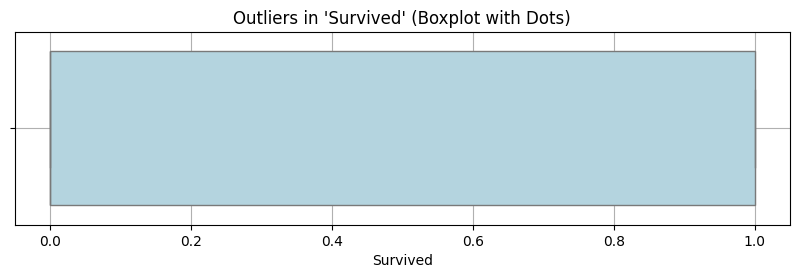

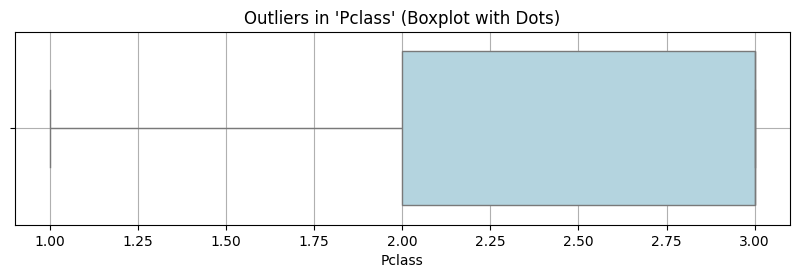

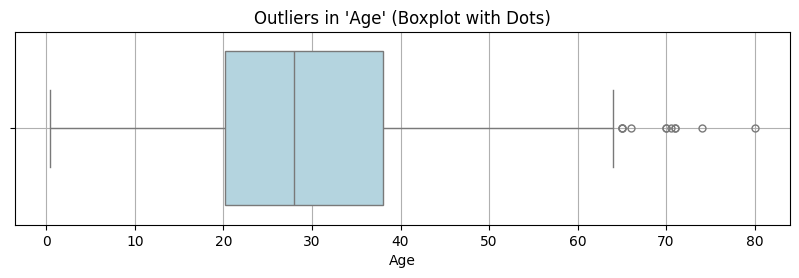

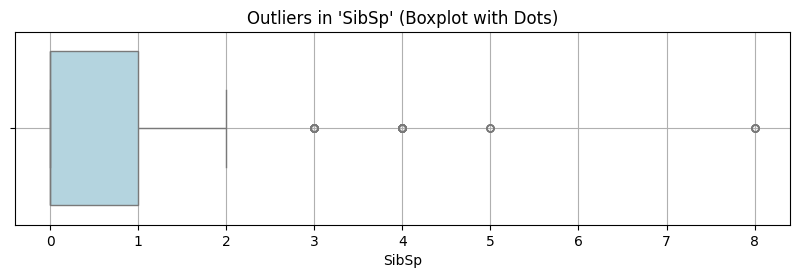

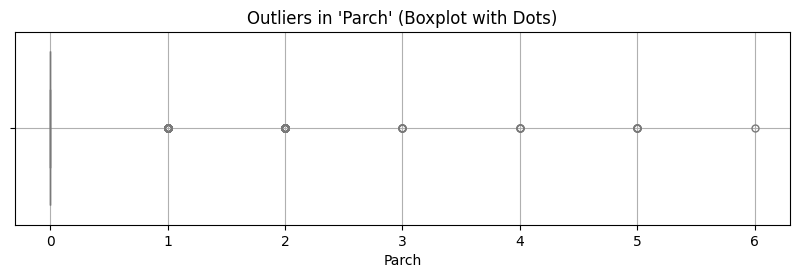

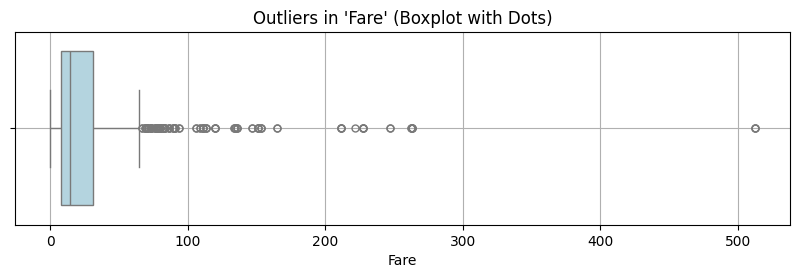

In [18]:
# plotting the outlier in boxplot
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = titanic.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 2.5))
    sns.boxplot(x=titanic[col], color='lightblue', fliersize=5)  # fliersize controls dot size
    plt.title(f"Outliers in '{col}' (Boxplot with Dots)")
    plt.grid(True)
    plt.show()
